In [33]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df=pd.read_csv("./datasets/stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [35]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [36]:
len(df["smoking_status"].unique())

4

<Axes: xlabel='hypertension', ylabel='count'>

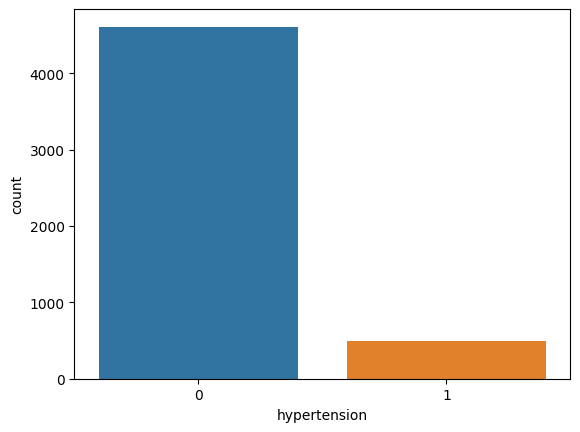

In [37]:
sns.countplot(x=df["hypertension"])

<Axes: xlabel='gender', ylabel='count'>

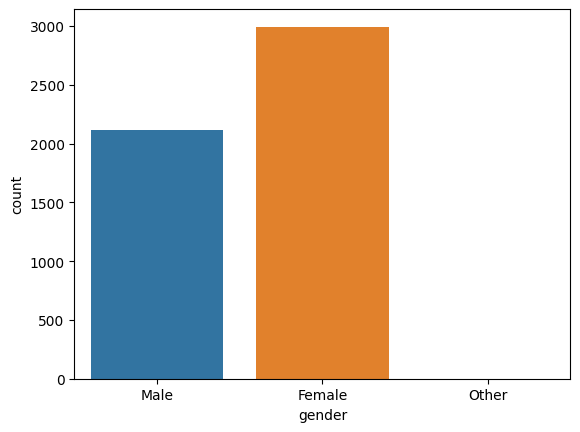

In [38]:
sns.countplot(x=df["gender"])

In [39]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

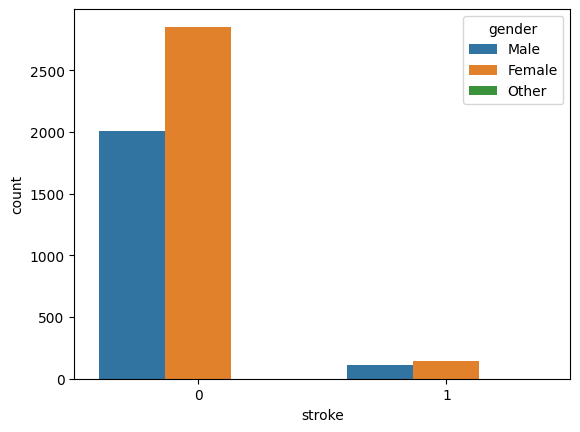

In [40]:
sns.countplot(data=df,x="stroke",hue="gender")

In [41]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
cat=[]
for col in df.columns:
    if len(df[col].unique())<10:
        cat.append(col)
le=LabelEncoder()
for col in cat:
    df[col]=le.fit_transform(df[col])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [43]:
df.index[df["gender"]==2].to_list()

[3116]

In [44]:
df=df.drop(3116,axis=0)

In [45]:
df=df.drop(["id"],axis=1)

<Figure size 2000x1000 with 0 Axes>

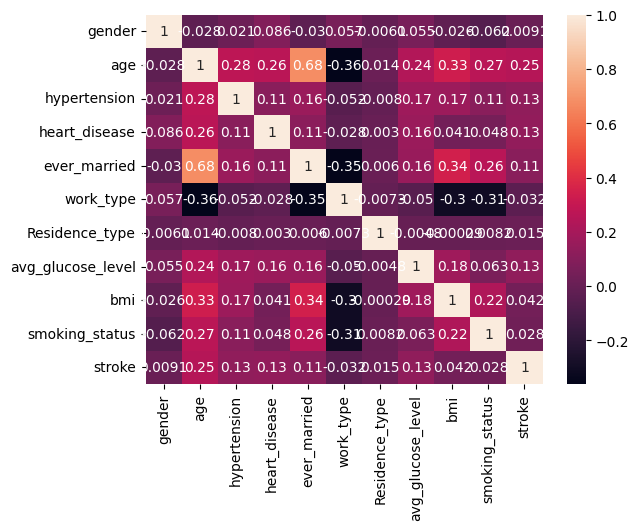

<Figure size 2000x1000 with 0 Axes>

In [46]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(20,10))

In [47]:
corr=df.corrwith(df['stroke'])
abs(corr).sort_values()

gender               0.009081
Residence_type       0.015415
smoking_status       0.028108
work_type            0.032323
bmi                  0.042341
ever_married         0.108299
hypertension         0.127891
avg_glucose_level    0.131991
heart_disease        0.134905
age                  0.245239
stroke               1.000000
dtype: float64

In [48]:
df=df.drop(["gender","Residence_type","smoking_status","work_type","bmi"],axis=1)

In [49]:
def non_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return not_outliers

In [50]:
df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
avg_glucose_level    0
stroke               0
dtype: int64

In [51]:
df["age"]=non_outliers_IQR(df["age"])
df["avg_glucose_level"]=non_outliers_IQR(df["avg_glucose_level"])

In [52]:
df["age"]=df["age"].fillna(df["age"].mean())
df["avg_glucose_level"]=df["avg_glucose_level"].fillna(df["avg_glucose_level"].mean())

In [53]:
df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,67.0,0,1,1,91.423498,1
1,61.0,0,0,1,91.423498,1
2,80.0,0,1,1,105.920000,1
3,49.0,0,0,1,91.423498,1
4,79.0,1,0,1,91.423498,1
...,...,...,...,...,...,...
5105,80.0,1,0,1,83.750000,0
5106,81.0,0,0,1,125.200000,0
5107,35.0,0,0,1,82.990000,0
5108,51.0,0,0,1,166.290000,0


In [54]:
num=[]
for col in df.columns:
    if col not in cat:
        num.append(col)
num

['age', 'avg_glucose_level']

In [72]:
X=df.iloc[:,:5]
y=df.iloc[:,-1]
X

,age,hypertension,heart_disease,ever_married,avg_glucose_level
0,67.0,0,1,1,91.423498
1,61.0,0,0,1,91.423498
2,80.0,0,1,1,105.920000
3,49.0,0,0,1,91.423498
4,79.0,1,0,1,91.423498
...,...,...,...,...,...
5105,80.0,1,0,1,83.750000
5106,81.0,0,0,1,125.200000
5107,35.0,0,0,1,82.990000
5108,51.0,0,0,1,166.290000


In [73]:
from sklearn.preprocessing import StandardScaler
features = X[num]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[num]=features
X

,age,hypertension,heart_disease,ever_married,avg_glucose_level
0,1.051242,0,1,1,0.000000
1,0.785889,0,0,1,0.000000
2,1.626174,0,1,1,0.684168
3,0.255182,0,0,1,0.000000
4,1.581949,1,0,1,0.000000
...,...,...,...,...,...
5105,1.626174,1,0,1,-0.362154
5106,1.670400,0,0,1,1.594096
5107,-0.363976,0,0,1,-0.398022
5108,0.343633,0,0,1,3.533355


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [75]:
from imblearn.combine import SMOTETomek
os=SMOTETomek()
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

In [76]:
X_train_os

,age,hypertension,heart_disease,ever_married,avg_glucose_level
0,0.078280,0,0,1,0.000000
1,1.095468,1,1,1,0.000000
2,-0.673555,0,0,0,-0.689690
3,0.962791,0,0,1,0.254218
4,-0.673555,0,0,1,0.869646
...,...,...,...,...,...
6161,0.840579,1,0,1,-1.014368
6162,-0.125014,0,0,1,-0.382471
6163,1.539939,0,0,1,0.000000
6164,1.300486,1,0,1,-0.857836


In [61]:
os=SMOTETomek()
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

In [78]:
X_train_os

,age,hypertension,heart_disease,ever_married,avg_glucose_level
0,0.078280,0,0,1,0.000000
1,1.095468,1,1,1,0.000000
2,-0.673555,0,0,0,-0.689690
3,0.962791,0,0,1,0.254218
4,-0.673555,0,0,1,0.869646
...,...,...,...,...,...
6161,0.840579,1,0,1,-1.014368
6162,-0.125014,0,0,1,-0.382471
6163,1.539939,0,0,1,0.000000
6164,1.300486,1,0,1,-0.857836


In [79]:
y_train_os.value_counts()

stroke
0    3083
1    3083
Name: count, dtype: int64

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rf=RandomForestClassifier()
rf.fit(X_train_os,y_train_os)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.861803084223013
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1608
           1       0.11      0.28      0.16        78

    accuracy                           0.86      1686
   macro avg       0.54      0.59      0.54      1686
weighted avg       0.92      0.86      0.89      1686

[[1431  177]
 [  56   22]]


In [100]:
rf2=RandomForestClassifier()
rf2.fit(X_train_os,y_train_os)
y_pred2=rf2.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.8623962040332147
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1608
           1       0.11      0.28      0.16        78

    accuracy                           0.86      1686
   macro avg       0.54      0.59      0.54      1686
weighted avg       0.92      0.86      0.89      1686

[[1432  176]
 [  56   22]]


In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_os,y_train_os)
y_pred_lr=lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

0.7562277580071174
              precision    recall  f1-score   support

           0       0.99      0.75      0.86      1608
           1       0.14      0.81      0.23        78

    accuracy                           0.76      1686
   macro avg       0.56      0.78      0.54      1686
weighted avg       0.95      0.76      0.83      1686

[[1212  396]
 [  15   63]]


In [110]:
import pickle
pickle.dump(lr,open("./artifacts/strokemodel.pkl","wb"))
pickle.dump(scaler,open("./artifacts/strokescalar.pkl","wb"))